# Ch02 Dollar Run Bar(A233740)

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.patches import Rectangle
import  matplotlib.dates as mdates

from adv_finance import bars, labeling, utils



In [3]:
%load_ext autoreload 
%autoreload 2

plt.style.use('seaborn-talk')
plt.style.use('bmh')
pd.set_option('display.max_rows', 100)


## Read tickdata -  A233740

In [14]:
TRADE_A233740 = pd.read_parquet('/nfs/data/interim_2018/TRADE_A233740.parq')
TRADE_A233740 = TRADE_A233740.set_index('TIMESTAMP')
# TRADE_A233740_01 = TRADE_A233740.loc['2018-01']


In [36]:
# df = TRADE_A233740_01
df = TRADE_A233740

## Data preprocess

In [16]:
%%time
# df = TRADE_A233740_03

# 매일 09:01 ~ 15:20 사이에 체결 주문만 가져온다(동시호가 거래체결을 제거하기 위함)
list_df = []
for t in pd.date_range(df.index[0], df.index[-1], freq='D'): 
    date = f"{t.year}-{t.month}-{t.day}"
    
    late_days = ["2018-01-02", "2018-11-15"]
    
    if date in late_days: 
        tm_begin = f"{date} 10:01"
        tm_end = f"{date} 16:20"
    else:
        tm_begin = f"{date} 09:01"
        tm_end = f"{date} 15:20"
        
    df0 = df.loc[tm_begin:tm_end]
    list_df.append(df0)
    

df = pd.concat(list_df)

CPU times: user 28.6 s, sys: 846 ms, total: 29.4 s
Wall time: 29.4 s


## Get dollar runs bar

In [37]:
%%time
df_bars, df_history = bars.get_dollar_run_bars(df, 3, 1, True)
df_bars = df_bars.set_index('timestamp')
df_history = df_history.set_index('tm')

CPU times: user 1min 49s, sys: 5.12 s, total: 1min 55s
Wall time: 1min 54s


In [21]:
# df_bars.to_parquet('/nfs/data/interim_2018/TRADE_A233740_DRB.parq')

In [43]:
# df = pd.read_parquet('/nfs/data/interim_2018/TRADE_A233740_DRB.parq')

In [38]:
def plot_bars(d0, df, df_bars, df_history): 
    df_bars0 = df_bars.loc[d0]
    df_history0 = df_history.loc[d0]
    df0 = df.loc[d0]

    plt.figure(figsize=(30, 10))
    plt.title('Run bars over the prices')
    plt.plot(df0.index.values, df0.PRICE.values, label='raw_prices', ls='--', color='black')
    plt.plot(df_bars0.index.values, df_bars0.close.values, label='run_bars', ls='--', markersize=10, marker='o', color='red')

    df_dv_ = df0.groupby(pd.Grouper(freq='5min'))[['DV']].count()
    df_dv_.plot(kind='bar', figsize=(30,10), label='DV')
    
    
    plt.figure(figsize=(30, 10))
    plt.title('Run bars cache history')
    plt.plot(df_history0.index.values, df_history0.cum_theta_buy.values, label='cum_theta_buy', ls='--', color='red')
    plt.plot(df_history0.index.values, df_history0.cum_theta_sell.values, label='cum_theta_sell', ls='--', color='blue')
    plt.plot(df_history0.index.values, df_history0.threshold.values, label='threshold', color='orange', linewidth=5)

    df_bars0_ = df_bars0.groupby(pd.Grouper(freq='10min'))[['close']].count()
    df_bars0_.plot(kind='bar', figsize=(30,10), label='Dollar run bars')
    
    plt.show()

## 정각 동시호가 제거 X

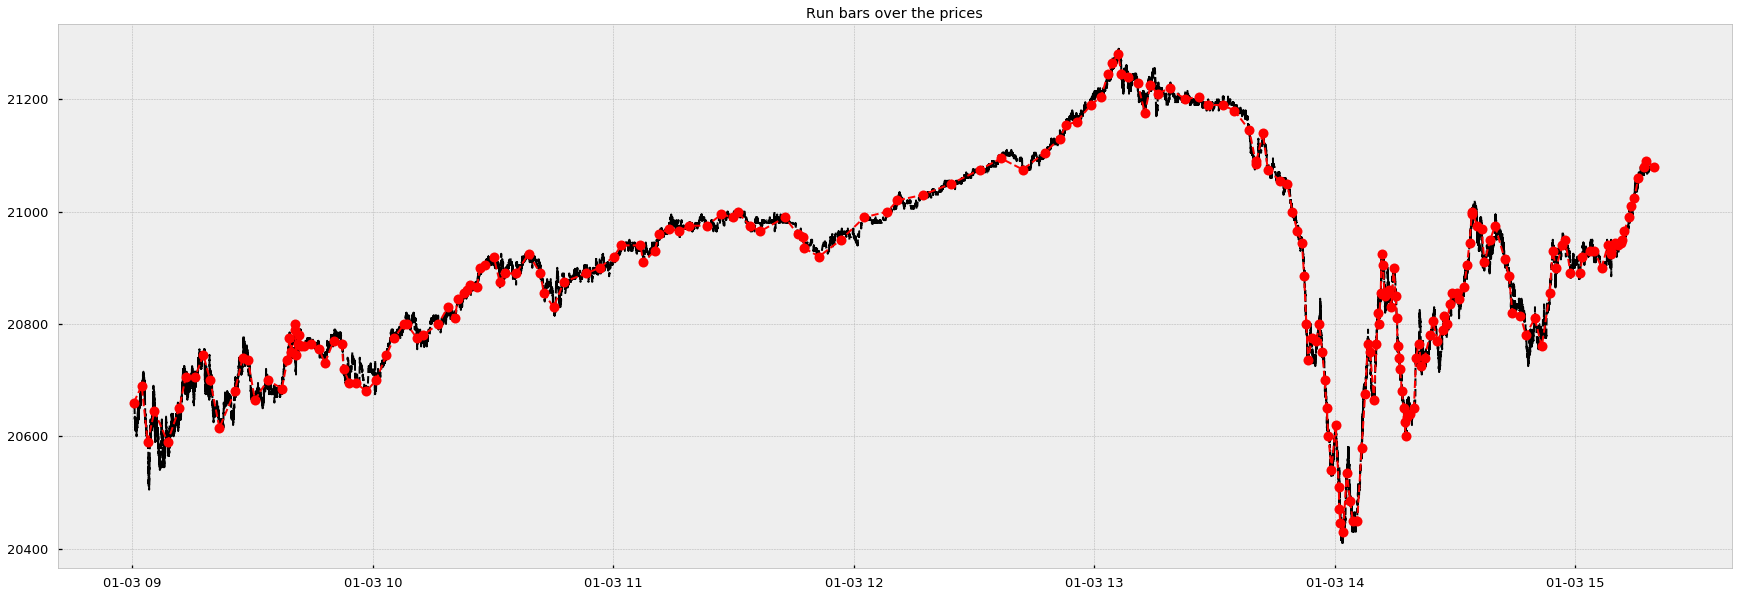

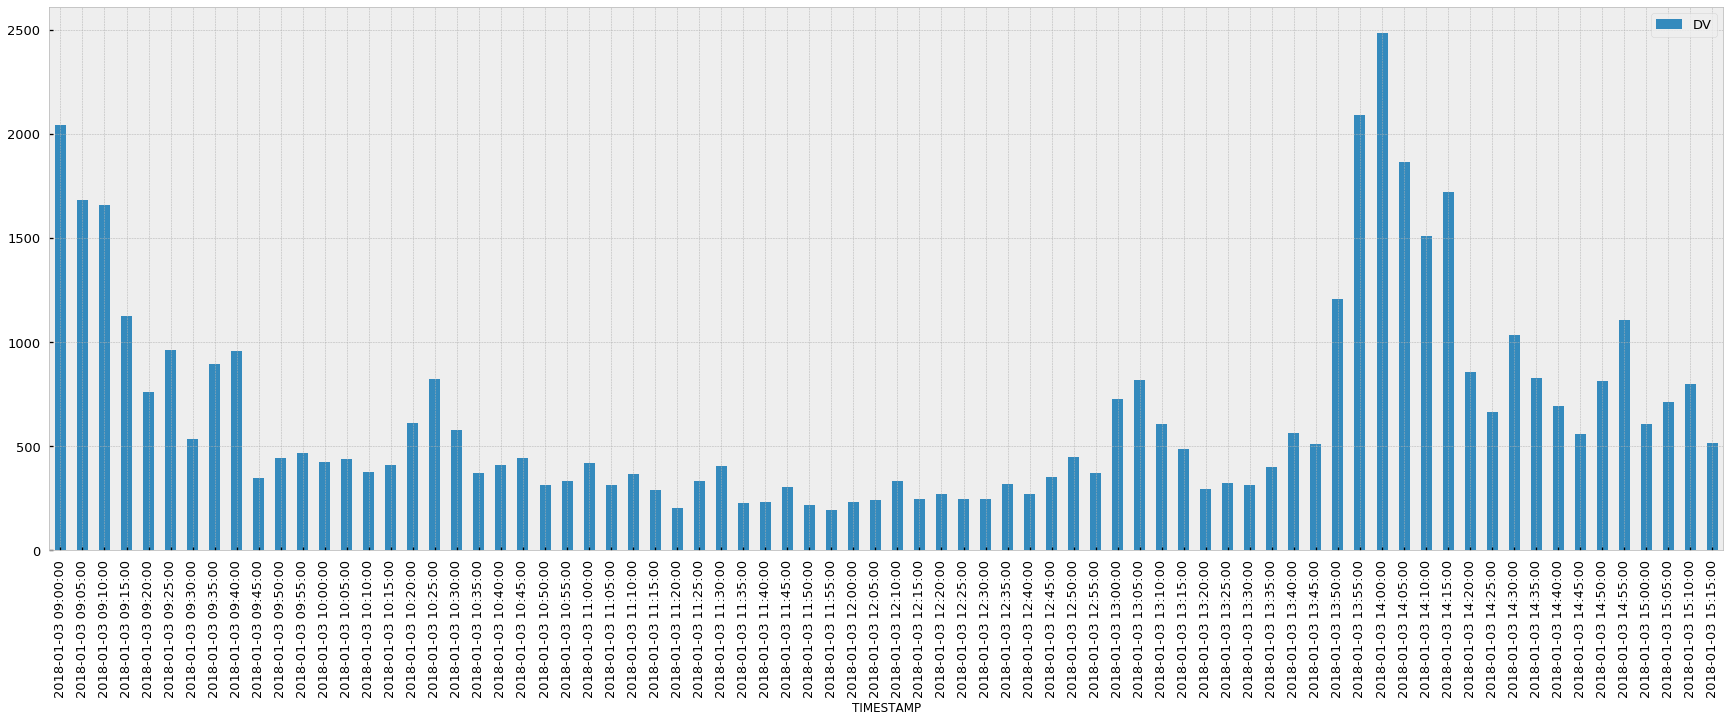

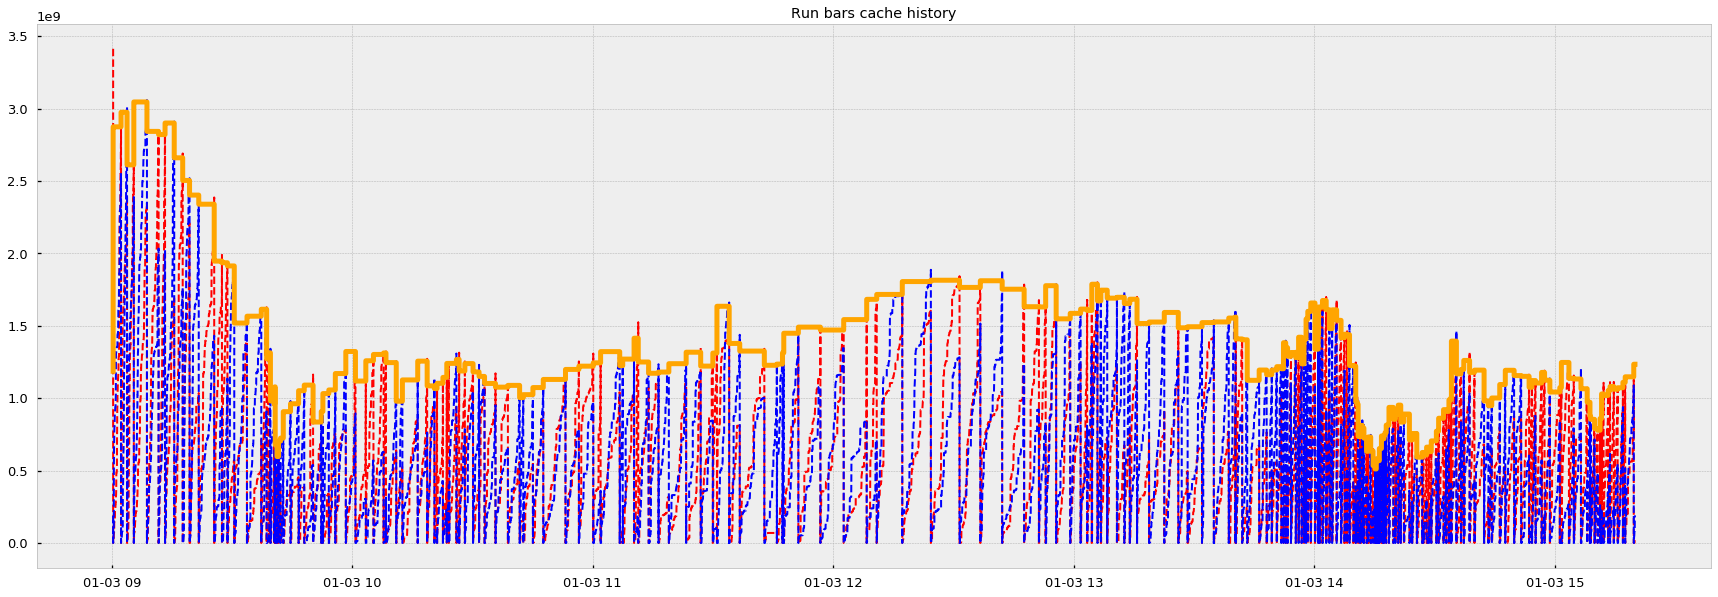

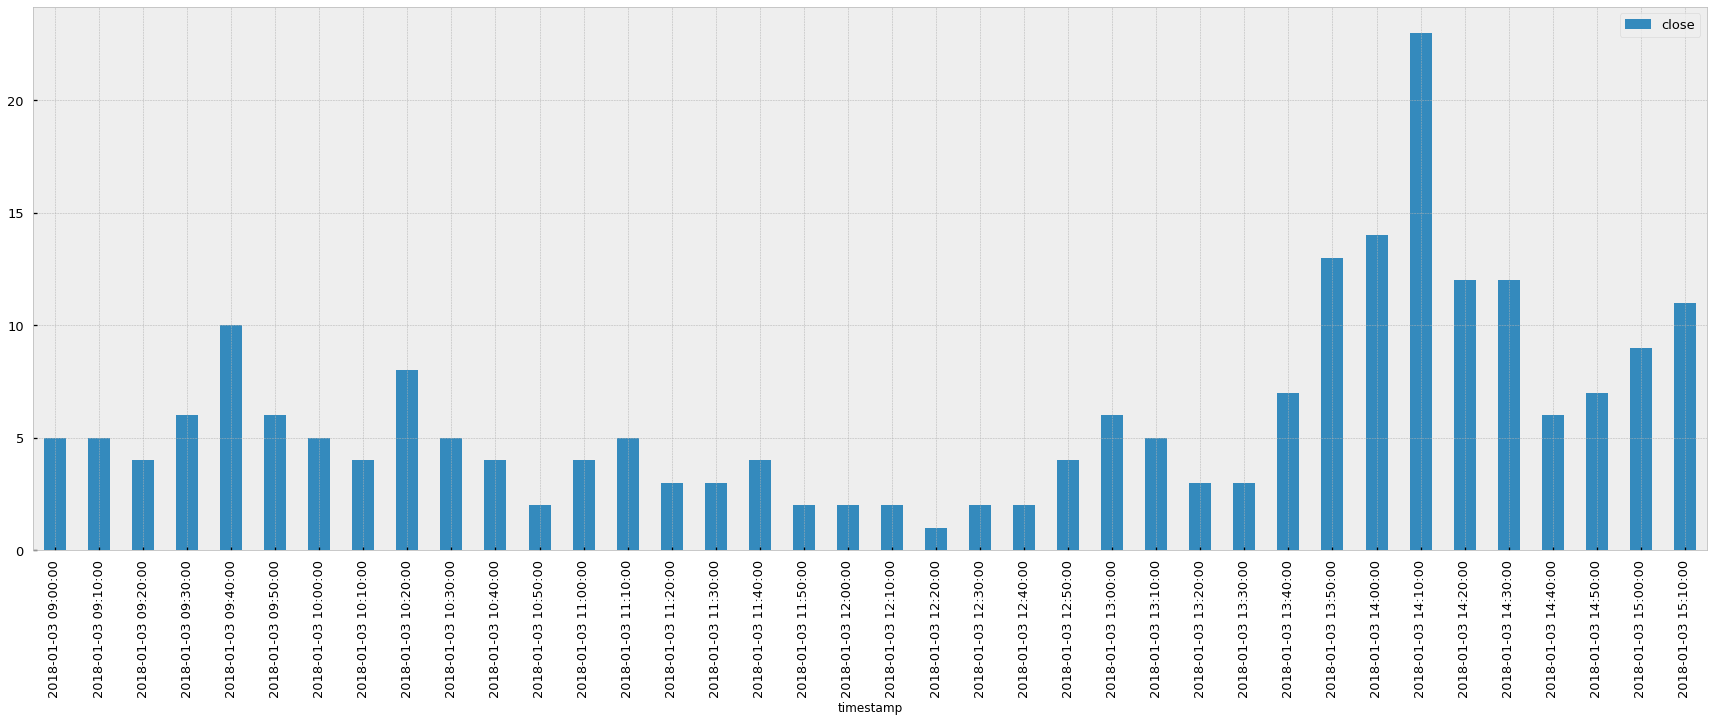

In [39]:
plot_bars('2018-01-03', df, df_bars, df_history)

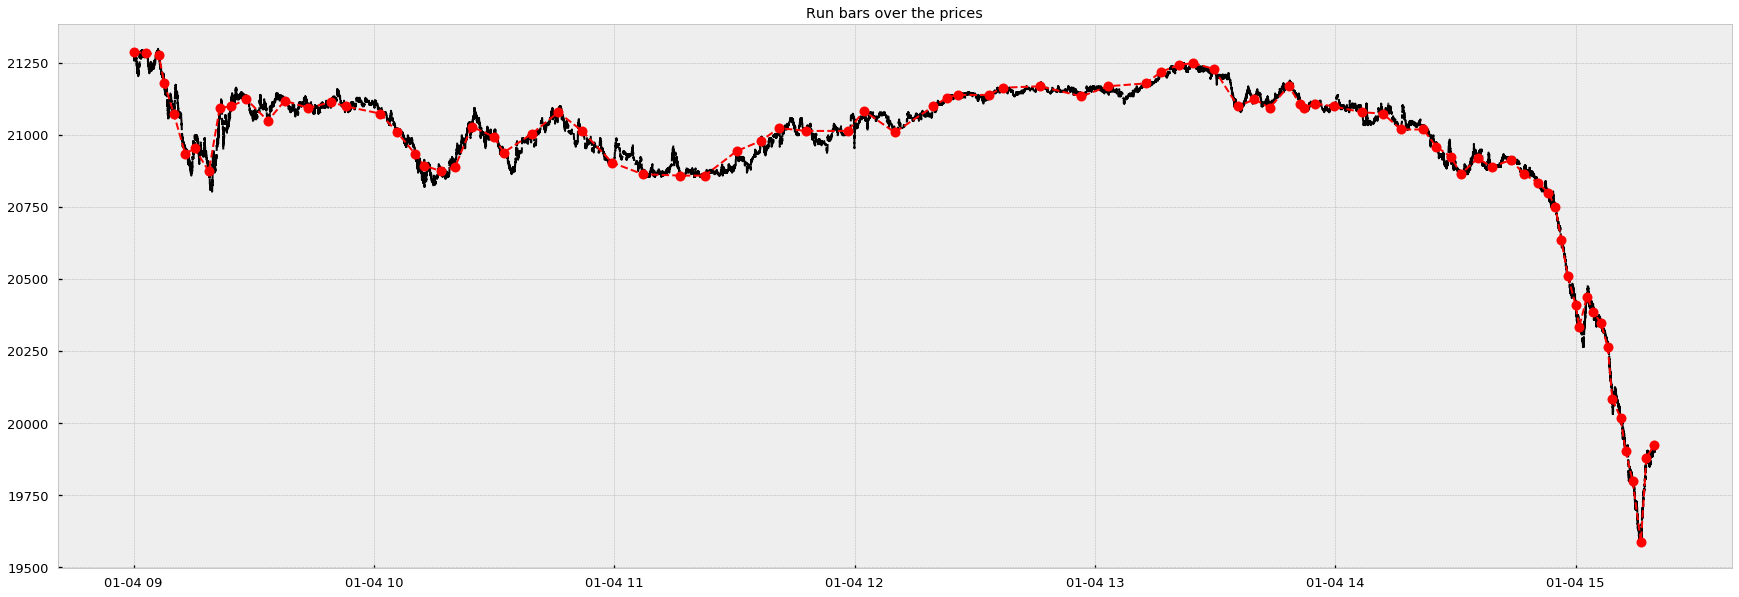

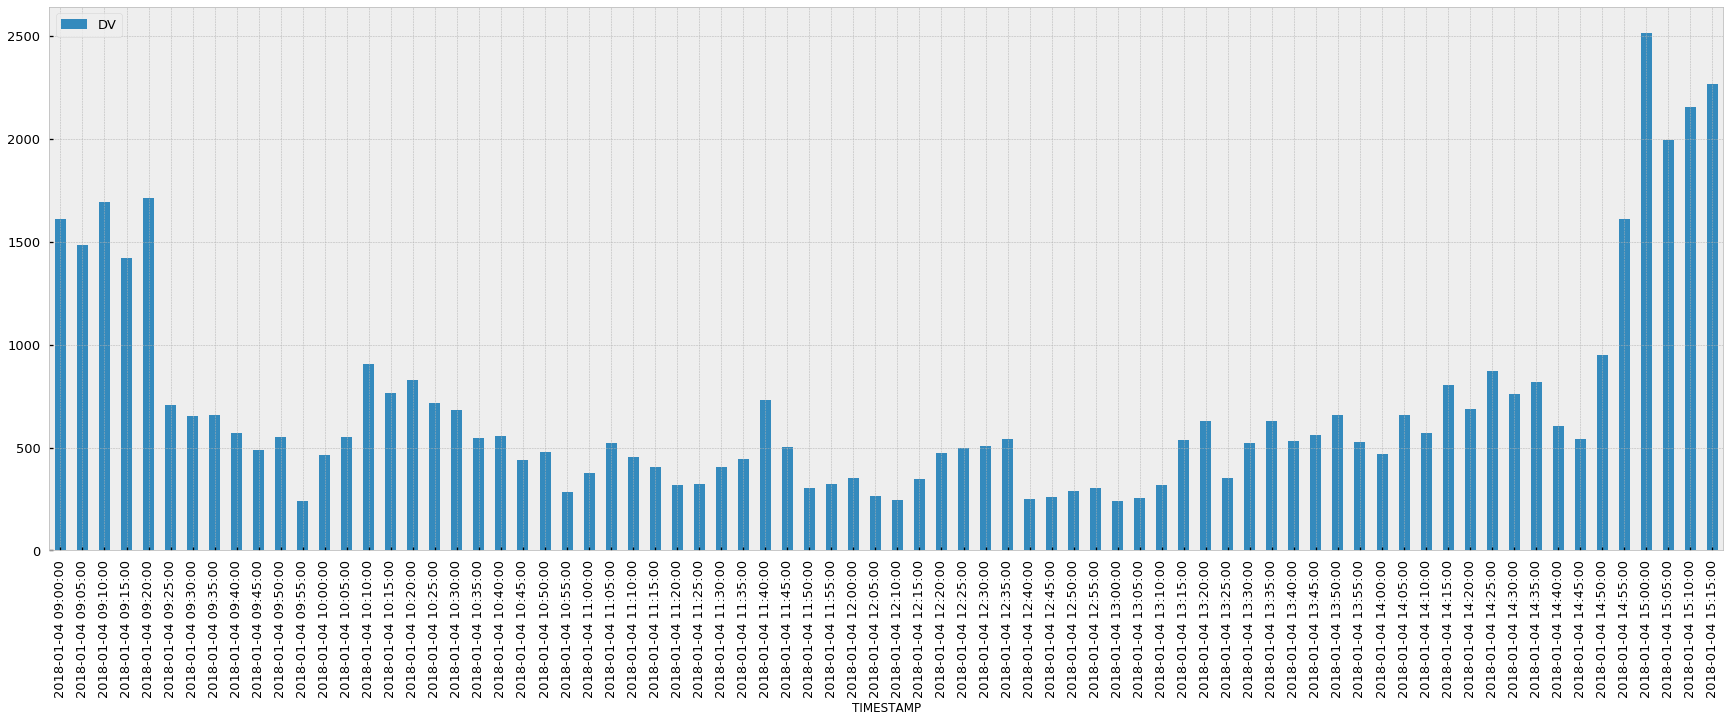

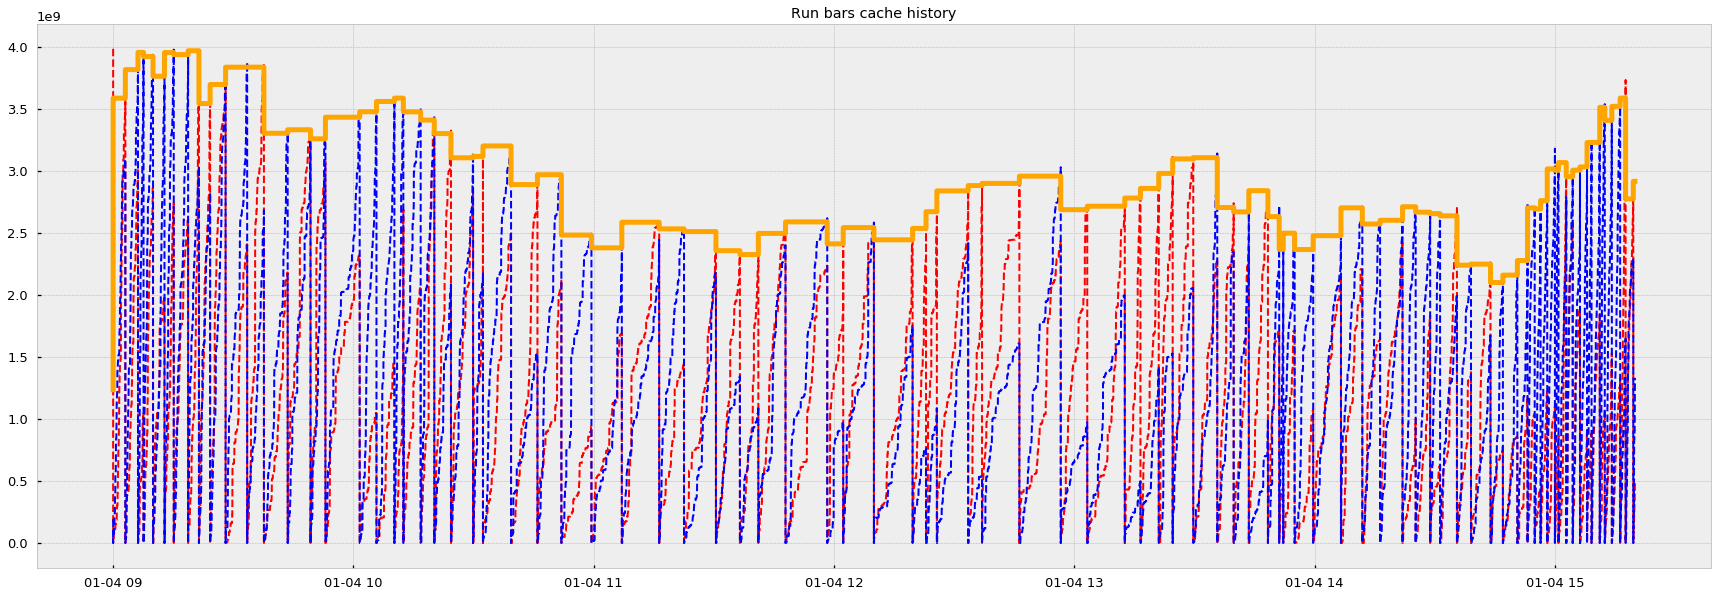

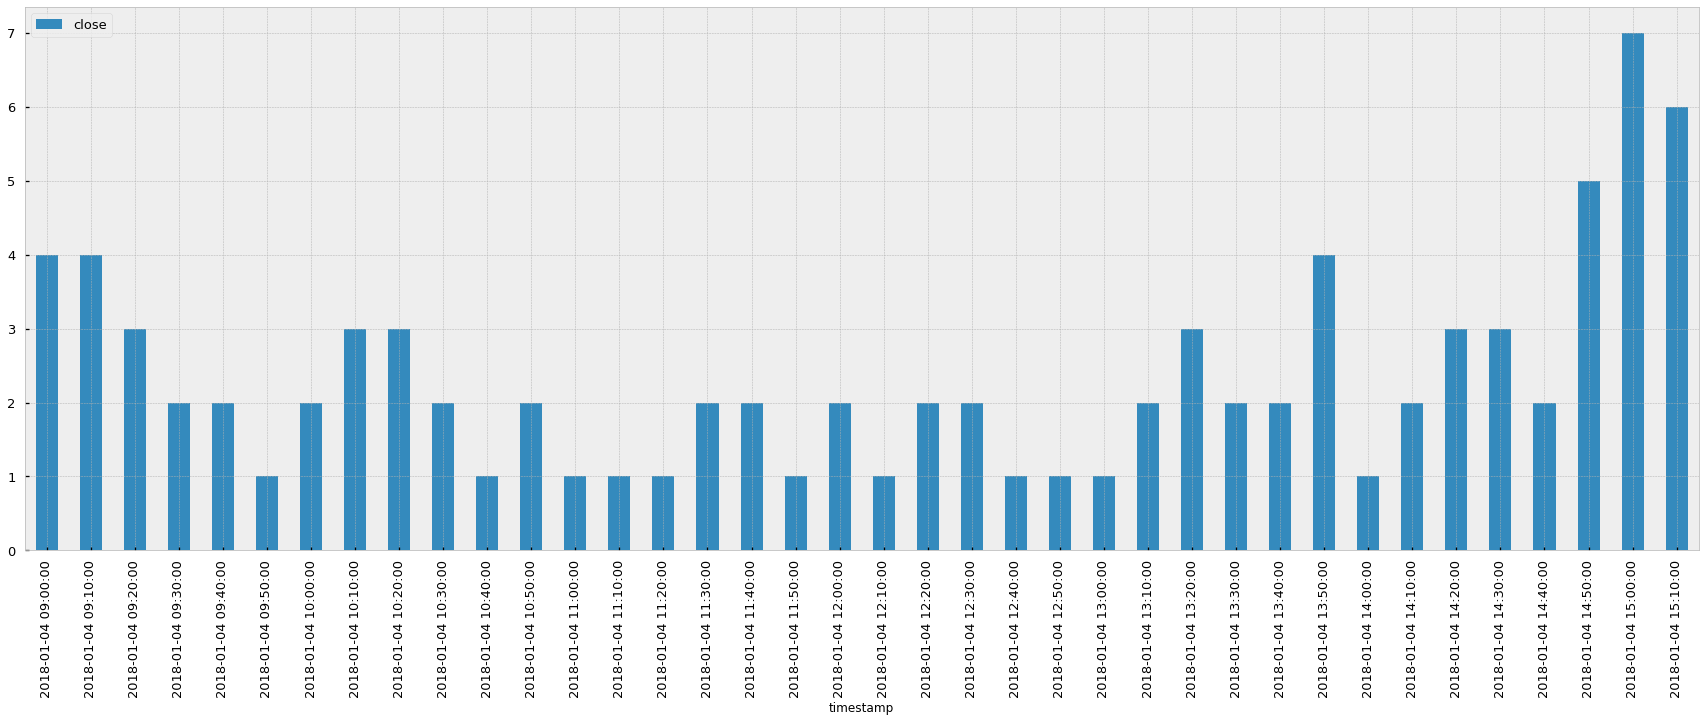

In [40]:
plot_bars('2018-01-04', df, df_bars, df_history)

##  정각 동시호가 제거 O


In [ ]:
# df0 = df.loc['2018-01-03 09:00':'2018-01-03 10:00']
# df_bars0 = df_bars.loc['2018-01-03 09:00':'2018-01-03 10:00']
# df_history0 = df_history.loc['2018-01-03 09:00':'2018-01-03 10:00']
    

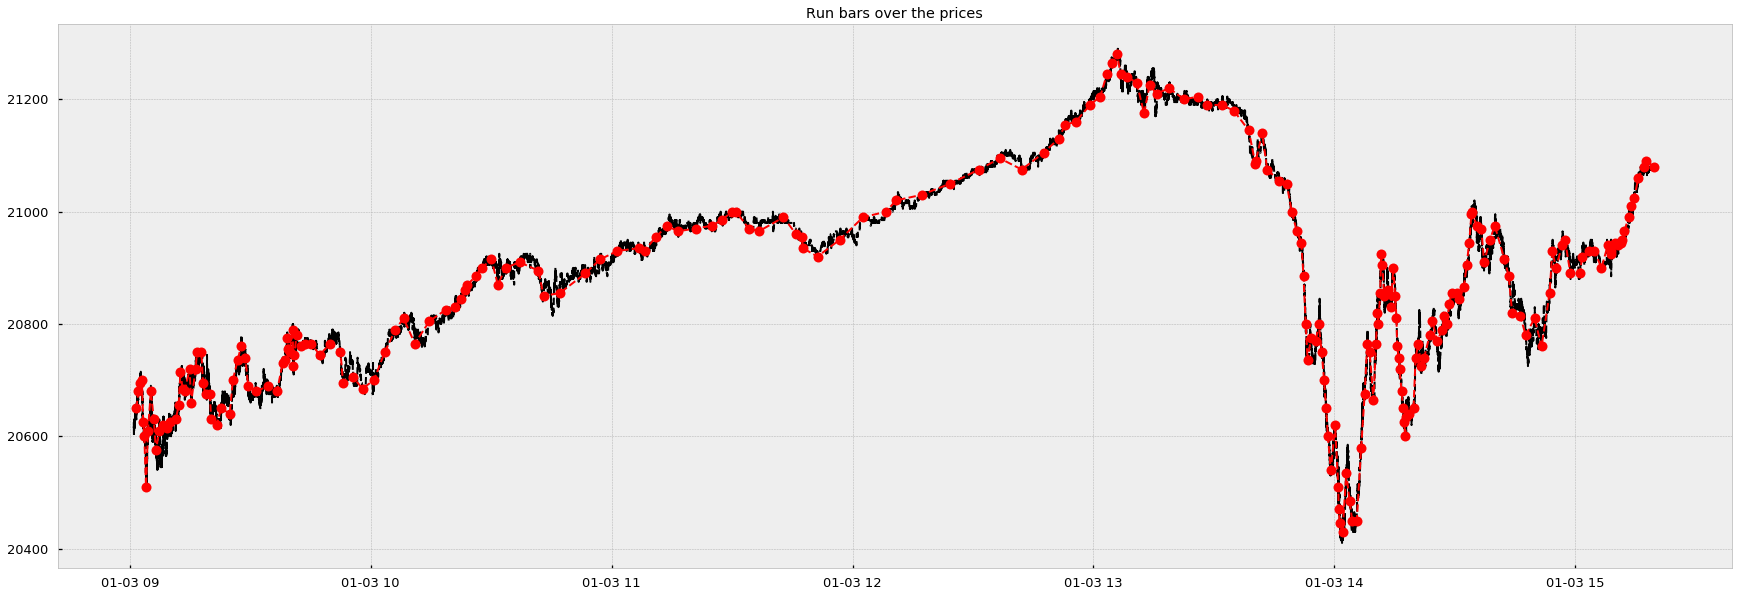

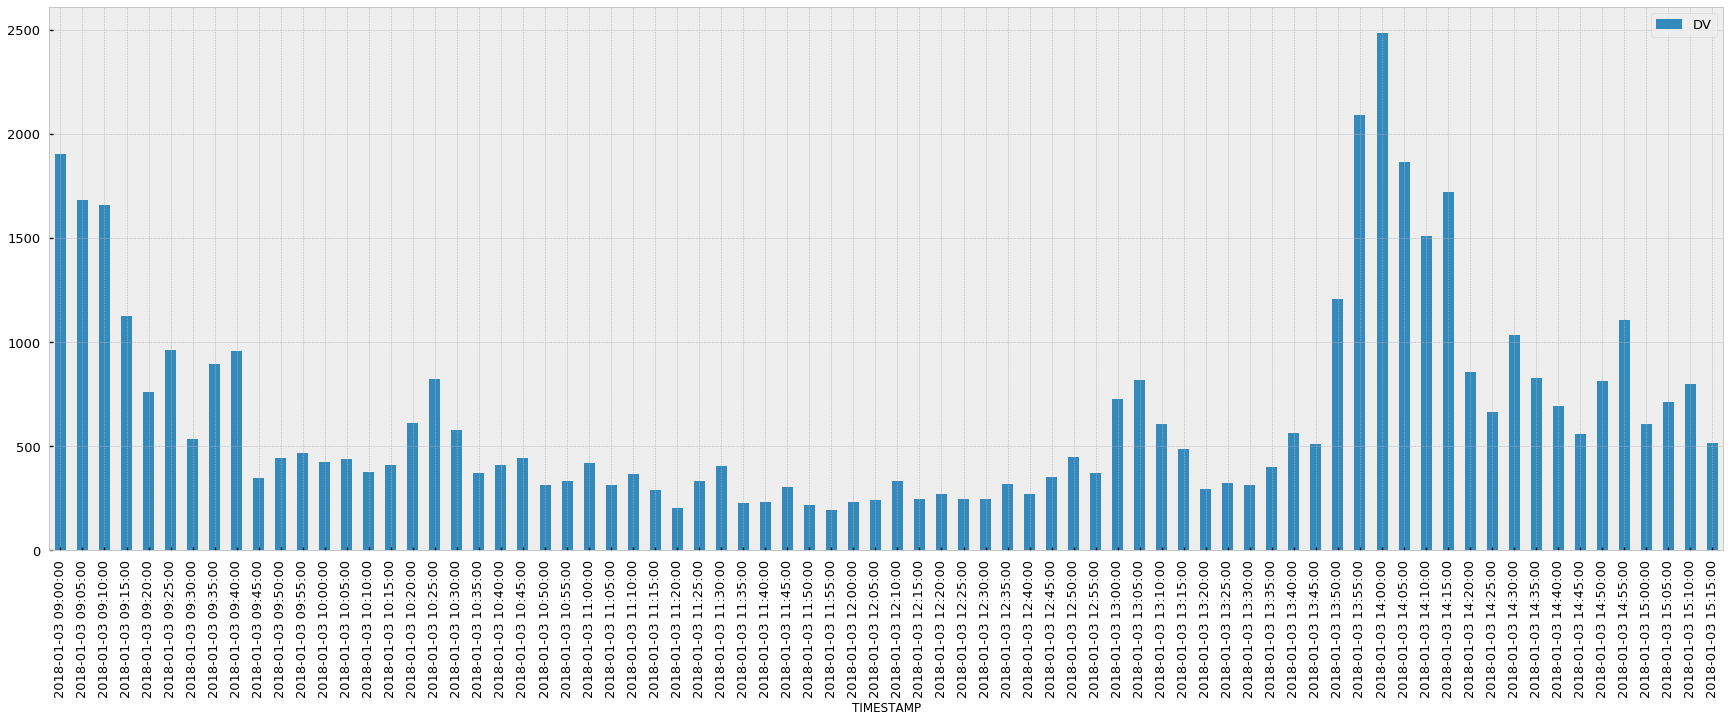

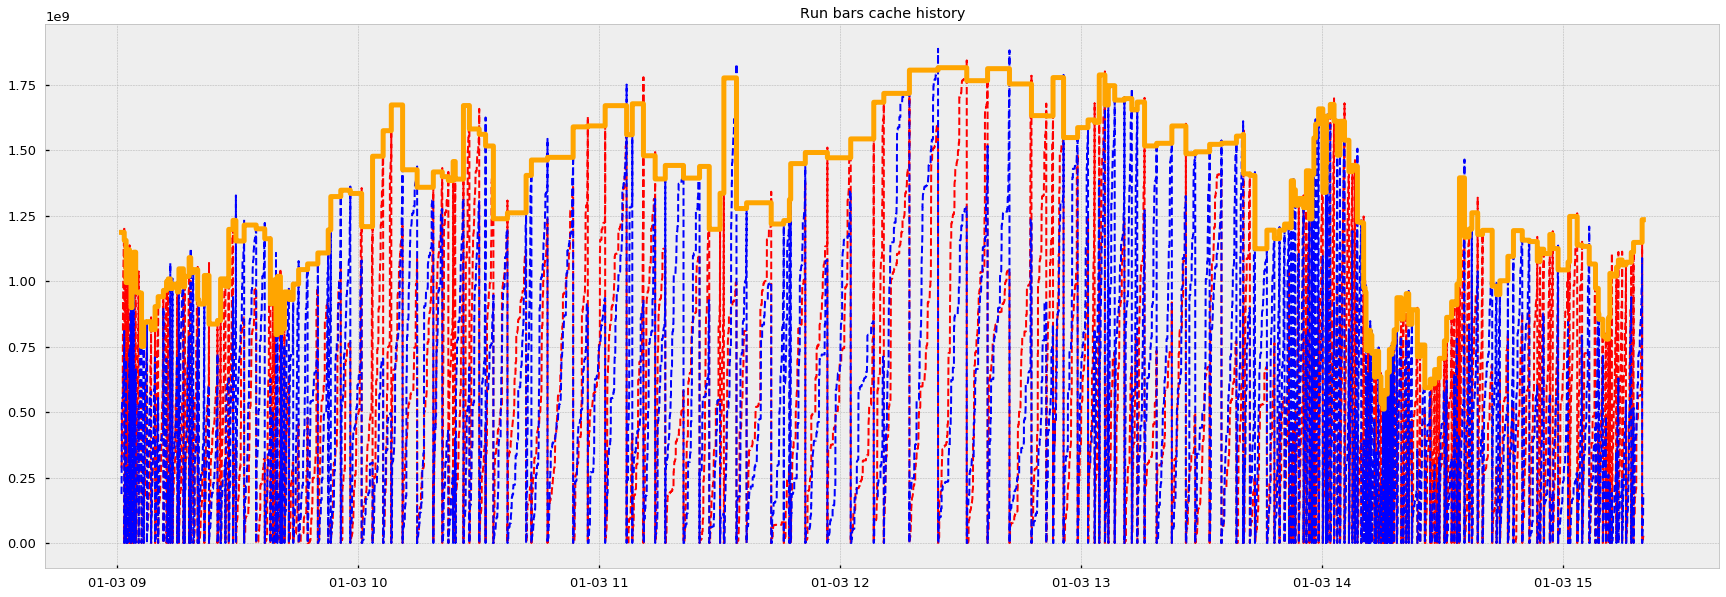

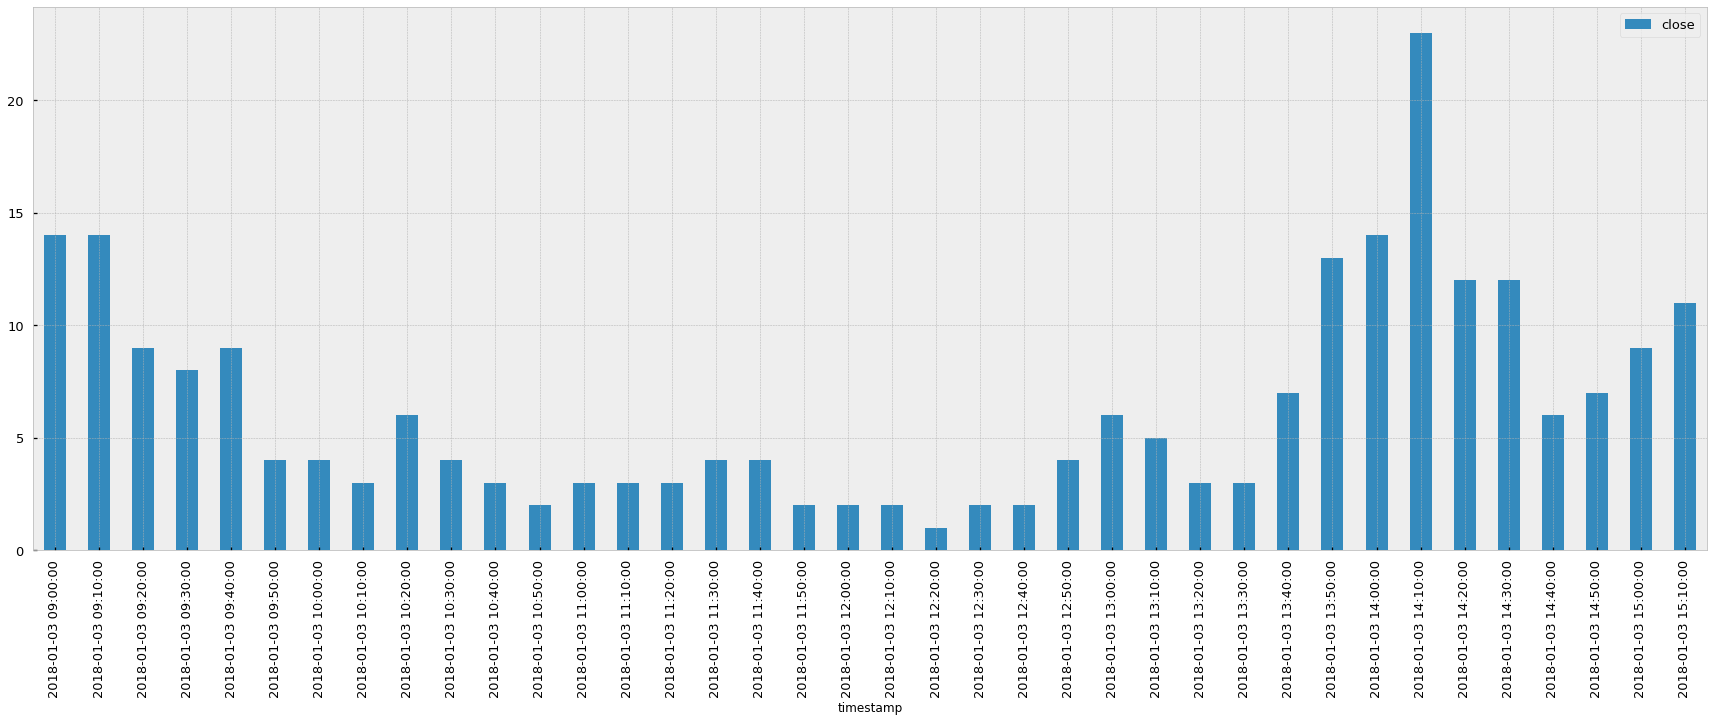

In [34]:
plot_bars('2018-01-03', df, df_bars, df_history)

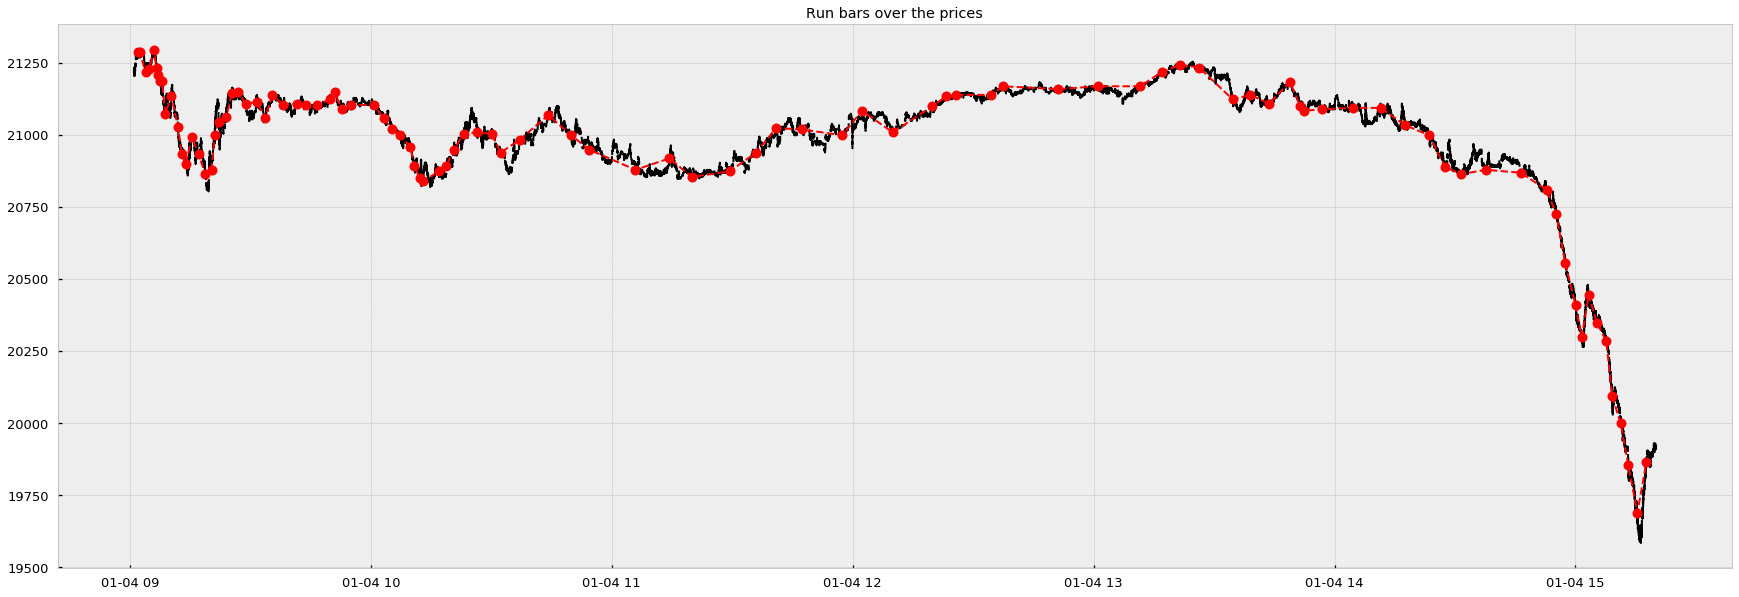

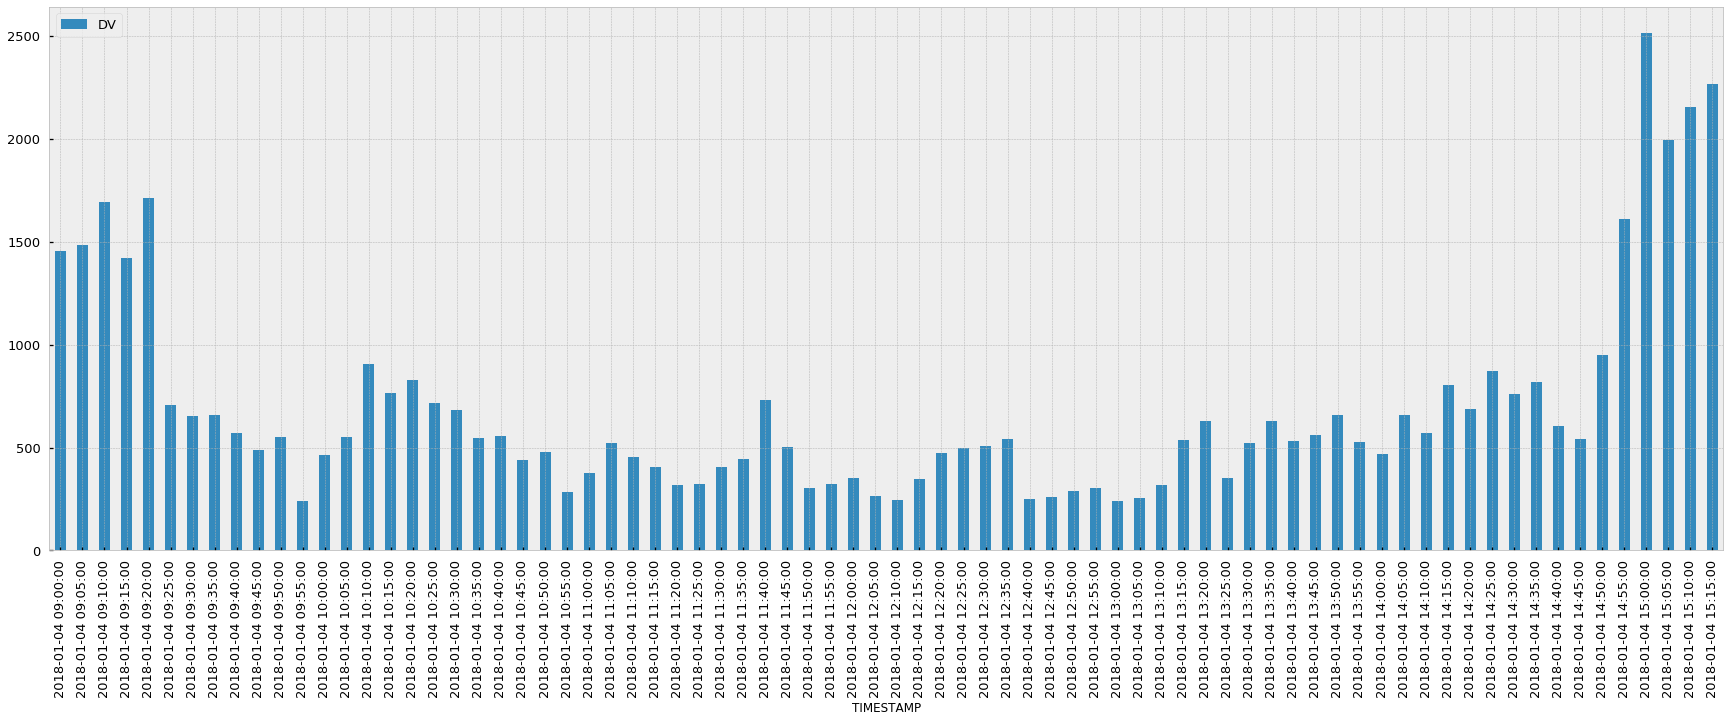

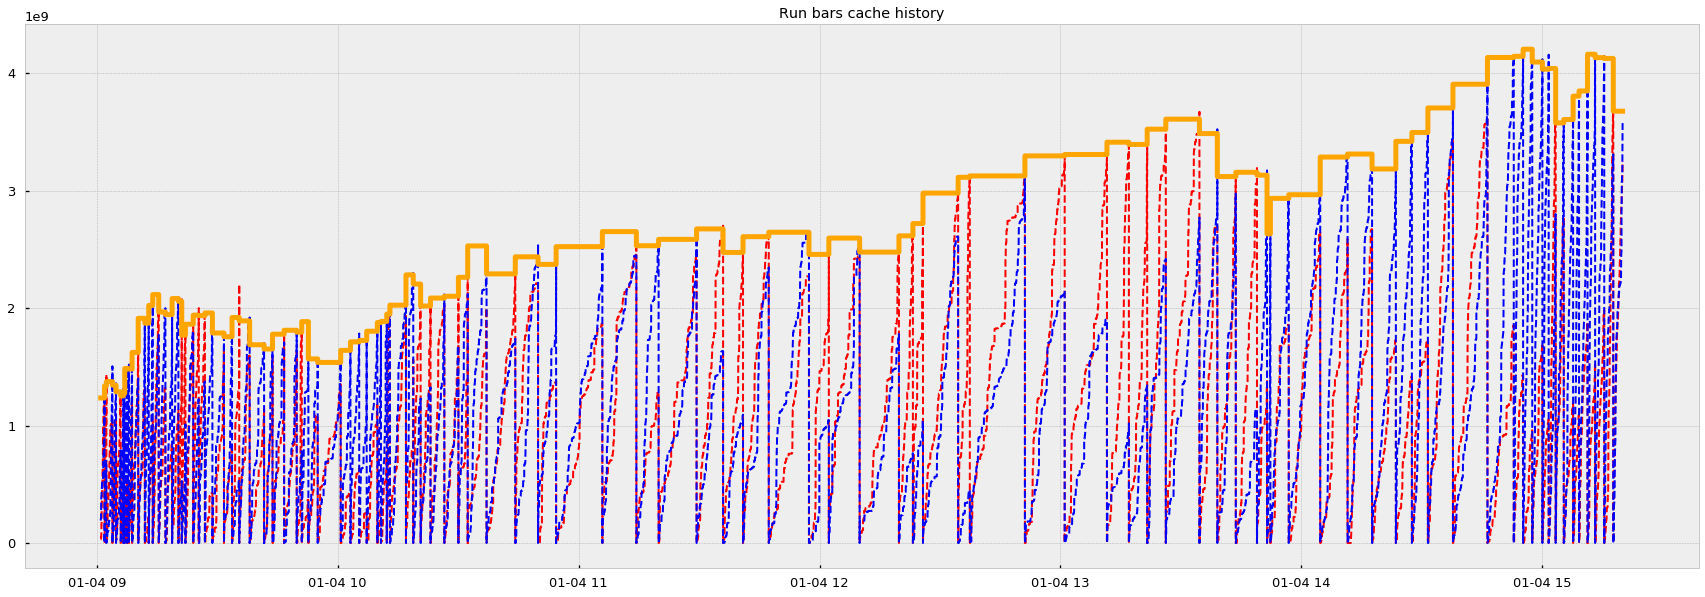

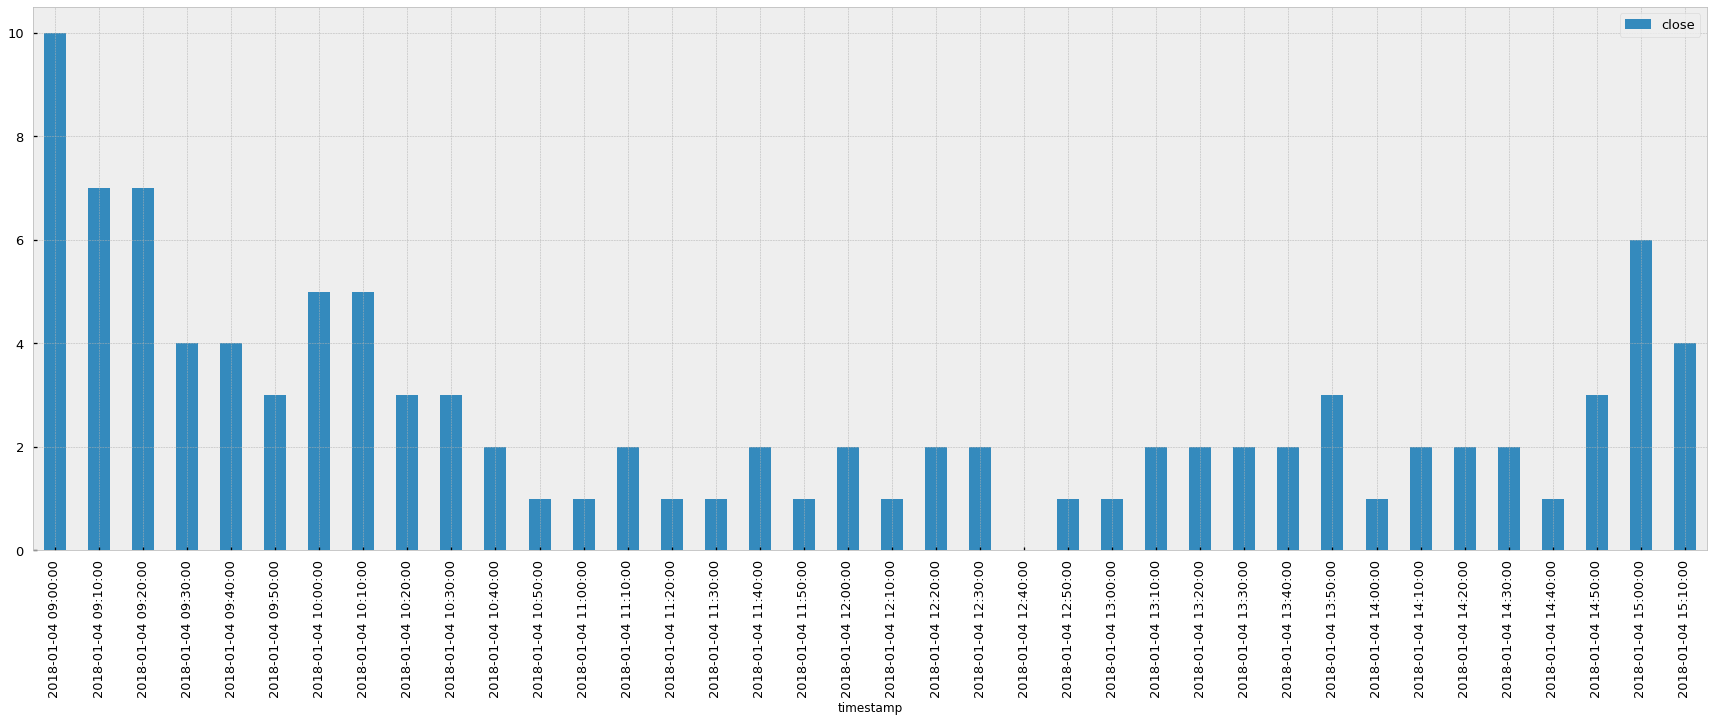

In [35]:
plot_bars('2018-01-04', df, df_bars, df_history)